In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [2]:
import tqdm

import stable_nalu

from RLfunctions import *

/home/raphaelg/anaconda3/lib/python3.7/site-packages/tensorflow-2.0.0b1-py3.7-linux-x86_64.egg/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/raphaelg/anaconda3/lib/python3.7/site-packages/tensorflow-2.0.0b1-py3.7-linux-x86_64.egg/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/raphaelg/anaconda3/lib/python3.7/site-packages/tensorflow-2.0.0b1-py3.7-linux-x86_64.egg/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
 

In [3]:
# We load CartPole-v1
env = gym.make('CartPole-v1')
# We wrap it in order to save our experiment on a file.
# env = Monitor(env, "./gym-results", force=True)

# Training with random mass, baseline

In [22]:
env_id = 'CartPole-v1'
value_learning_rate = 0.001
actor_learning_rate = 0.001
gamma = 0.99
entropy = 1
seed = 1

config_a2c = {
    'env_id': env_id,
    'gamma': gamma,
    'seed': seed,
    'value_network': {'learning_rate': value_learning_rate},
    'actor_network': {'learning_rate': actor_learning_rate},
    'entropy': entropy
}

print("Current config_a2c is:")
pprint(config_a2c)

Current config_a2c is:
{'actor_network': {'learning_rate': 0.001},
 'entropy': 1,
 'env_id': 'CartPole-v1',
 'gamma': 0.99,
 'seed': 1,
 'value_network': {'learning_rate': 0.001}}


Epoch 0/1000: Mean rewards: 23.24, Std: 9.17
Epoch 50/1000: Mean rewards: 32.62, Std: 16.34
Epoch 100/1000: Mean rewards: 47.7, Std: 26.2
Epoch 150/1000: Mean rewards: 76.86, Std: 43.65
Epoch 200/1000: Mean rewards: 145.32, Std: 76.72
Epoch 250/1000: Mean rewards: 158.84, Std: 70.1
Epoch 300/1000: Mean rewards: 205.9, Std: 97.47
Epoch 350/1000: Mean rewards: 263.78, Std: 129.49
Epoch 400/1000: Mean rewards: 336.36, Std: 123.95
Epoch 450/1000: Mean rewards: 310.84, Std: 107.94
Epoch 500/1000: Mean rewards: 332.74, Std: 105.06
Epoch 550/1000: Mean rewards: 405.28, Std: 119.95
Epoch 600/1000: Mean rewards: 448.92, Std: 99.47
Epoch 650/1000: Mean rewards: 438.46, Std: 84.92
Epoch 700/1000: Mean rewards: 466.48, Std: 81.12
Epoch 750/1000: Mean rewards: 469.68, Std: 87.26
Epoch 800/1000: Mean rewards: 487.88, Std: 51.57
Epoch 850/1000: Mean rewards: 474.92, Std: 60.46
Epoch 900/1000: Mean rewards: 472.62, Std: 79.26
Epoch 950/1000: Mean rewards: 434.62, Std: 105.22
Epoch 999/1000: Mean rewar

<IPython.core.display.Javascript object>


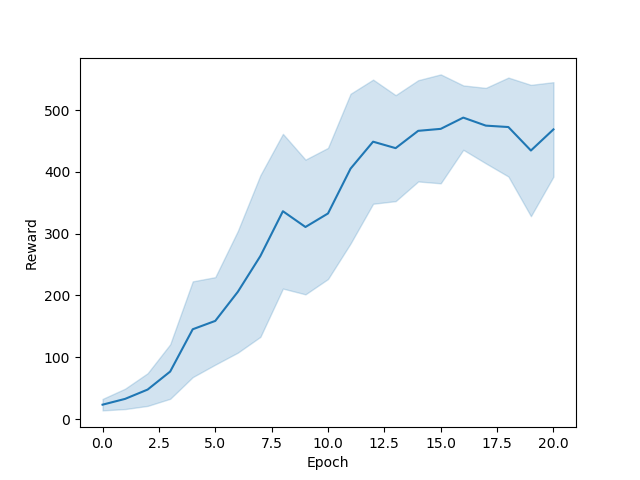

The trainnig was done over a total of 1718 episodes


In [23]:
agent_baseline_range = A2CAgentRandom(config_a2c, range_train=(0.1, 0.1), range_eval=(0.1, 0.1))
rewards = agent_baseline_range.training_batch(1000, 256)

In [40]:
eval_agent(agent_baseline_range, 500, 0.1, 0.2)


Mean success : 467.40 +- 82.40


In [41]:
eval_agent(agent_baseline_range, 500, 0.05, 0.6)


Mean success : 456.79 +- 96.88


In [42]:
eval_agent(agent_baseline_range, 500, 0.05, 1.5)


Mean success : 319.76 +- 191.35


In [43]:
eval_agent(agent_baseline_range, 500, 0.05, 2)


Mean success : 241.01 +- 219.93


In [44]:
eval_agent(agent_baseline_range, 500, 0.01, 5)


Mean success : 96.87 +- 175.08


## Training on a larger range

In [30]:
agent_baseline_range2 = A2CAgentRandom(config_a2c, range_train=(0.05, 0.5), range_eval=(0.03, 0.7))
rewards = agent_baseline_range2.training_batch(1000, 256)

Epoch 0/1000: Mean rewards: 20.36, Std: 9.77
Epoch 50/1000: Mean rewards: 34.9, Std: 24.95
Epoch 100/1000: Mean rewards: 56.4, Std: 37.08
Epoch 150/1000: Mean rewards: 96.84, Std: 62.0
Epoch 200/1000: Mean rewards: 179.28, Std: 87.89
Epoch 250/1000: Mean rewards: 163.54, Std: 56.02
Epoch 300/1000: Mean rewards: 256.3, Std: 107.01
Epoch 350/1000: Mean rewards: 298.94, Std: 122.23
Epoch 400/1000: Mean rewards: 327.66, Std: 145.99
Epoch 450/1000: Mean rewards: 370.5, Std: 128.35
Epoch 500/1000: Mean rewards: 412.34, Std: 104.12
Epoch 550/1000: Mean rewards: 425.04, Std: 115.71
Epoch 600/1000: Mean rewards: 425.0, Std: 127.01
Epoch 650/1000: Mean rewards: 430.14, Std: 94.21
Epoch 700/1000: Mean rewards: 454.52, Std: 63.03
Epoch 750/1000: Mean rewards: 420.78, Std: 93.7
Epoch 800/1000: Mean rewards: 435.3, Std: 83.14
Epoch 850/1000: Mean rewards: 444.94, Std: 92.22
Epoch 900/1000: Mean rewards: 454.82, Std: 100.65
Epoch 950/1000: Mean rewards: 471.06, Std: 79.31
Epoch 999/1000: Mean rewards

<IPython.core.display.Javascript object>

The trainnig was done over a total of 1614 episodes


In [36]:
eval_agent(agent_baseline_range2, 500, 0.1, 0.2)


Mean success : 489.07 +- 52.35


In [37]:
eval_agent(agent_baseline_range2, 500, 0.05, 0.6)


Mean success : 478.44 +- 66.76


In [38]:
eval_agent(agent_baseline_range2, 500, 0.05, 2)


Mean success : 271.79 +- 224.45


In [39]:
eval_agent(agent_baseline_range2, 500, 0.01, 5)


Mean success : 116.98 +- 191.55


# NAU agent

## RNN

### Functions

In [278]:
class ValueNetworkNAURNN(stable_nalu.abstract.ExtendedTorchModule):
    UNIT_NAMES = stable_nalu.layer.GeneralizedCell.UNIT_NAMES

    def __init__(self, unit_name, input_size=5, hidden_size=16, **kwargs):
        super().__init__('network', writer=None, **kwargs)

        self.unit_name = unit_name
        self.input_size = input_size
        self.hidden_size = hidden_size

        # Since for the 'mul' problem, the zero_state should be 1, and for the
        # 'add' problem it should be 0. The zero_states are allowed to be
        # # optimized.
        if unit_name == 'LSTM':
            self.zero_state = torch.nn.ParameterDict({
                'h_t0': torch.nn.Parameter(torch.Tensor(self.hidden_size)),
                'c_t0': torch.nn.Parameter(torch.Tensor(self.hidden_size))
            })
        else:
            self.zero_state = torch.nn.Parameter(torch.Tensor(self.hidden_size))

        self.recurent_cell = stable_nalu.layer.GeneralizedCell(input_size, self.hidden_size,
                                             unit_name,
                                             writer=self.writer,
                                             name='recurrent_layer',
                                             **kwargs)
        self.output_layer = stable_nalu.layer.GeneralizedLayer(self.hidden_size, 1,
                                            'linear'
                                                if unit_name in {'GRU', 'LSTM', 'RNN-tanh', 'RNN-ReLU'}
                                                else unit_name,
                                             writer=self.writer,
                                             name='output_layer',
                                             **kwargs)
        self.reset_parameters()

    def reset_parameters(self):
        if self.unit_name == 'LSTM':
            for zero_state in self.zero_state.values():
                torch.nn.init.zeros_(zero_state)
        else:
            torch.nn.init.zeros_(self.zero_state)

        self.recurent_cell.reset_parameters()
        self.output_layer.reset_parameters()

    def forward(self, x):
        """Performs recurrent iterations over the input.

        Arguments:
            input: Expected to have the shape [obs, time, dims]
        """
        if len(x.size()) == 2:
            x = x[None]
        # Perform recurrent iterations over the input
        if self.unit_name == 'LSTM':
            h_tm1 = tuple(zero_state.repeat(x.size(0), 1) for zero_state in self.zero_state.values())
        else:
            h_tm1 = self.zero_state.repeat(x.size(0), 1)

        hs = []
        for t in range(x.size(1)):
            x_t = x[:, t]
            h_t = self.recurent_cell(x_t, h_tm1)
            h_tm1 = h_t
            hs.append(h_t)

        # Grap the final hidden output and use as the output from the recurrent layer
#         z_1 = h_t[0] if self.unit_name == 'LSTM' else h_t
        z = [x[0] if self.unit_name == 'LSTM' else x for x in hs]
#         z_2 = self.output_layer(z_1)
        z_2 = self.output_layer(torch.stack(z))
        return z_2

    def extra_repr(self):
        return 'unit_name={}, input_size={}'.format(
            self.unit_name, self.input_size
        )
    
    def predict(self, x):
        return self(x).detach().numpy()

In [271]:
class A2CAgentRNN(A2CAgentRandom):

    def __init__(self, config, range_train, range_eval, a_net, v_net, LSTM=False, reg=100):
        super(A2CAgentRNN, self).__init__(config, range_train, range_eval)
        self.value_network = v_net
        self.actor_network = a_net
        self.value_network_optimizer = optim.RMSprop(self.value_network.parameters(),
                                                     lr=config['value_network']['learning_rate'])
        self.actor_network_optimizer = optim.RMSprop(self.actor_network.parameters(),
                                                     lr=config['actor_network']['learning_rate'])
        self.recurrent = LSTM
        self.lambda_reg = reg
        
    def optimize_model(self, observations, actions, returns, advantages, nb_traj):
        # Optimize value function
        # MSE for the values
        Vs_current = self.value_network(torch.tensor(observations, dtype=torch.float)).flatten()
        loss_value = F.mse_loss(Vs_current, torch.tensor(returns, dtype=torch.float))
        if hasattr(self.value_network, 'regualizer'):
            loss_value += VR.regualizer()['W']
        self.value_network_optimizer.zero_grad()
        loss_value.backward()
        self.value_network_optimizer.step()

        # Actor & Entropy loss
        Policies = self.actor_network(torch.tensor(observations, dtype=torch.float))
        Policies_action = torch.stack([x[actions[i]] for i, x in enumerate(Policies)])
        loss_action = - torch.sum(torch.tensor(advantages, dtype=torch.float) * torch.log(Policies_action) +  # actor
                                  0.001 * Policies_action * torch.log(Policies_action)) / nb_traj # entropy
        self.actor_network_optimizer.zero_grad()
        loss_action.backward()
        self.actor_network_optimizer.step()
        
    def training_batch(self, epochs, batch_size):
        """Perform a training by batch

        Parameters
        ----------
        epochs : int
            Number of epochs
        batch_size : int
            The size of a batch
        """
        episode_count = 0
        actions = np.empty((batch_size,), dtype=np.int)
        dones = np.empty((batch_size,), dtype=np.bool)
        rewards, values = np.empty((2, batch_size), dtype=np.float)
        observations = np.empty((batch_size,) + (self.env.observation_space.shape[0]+1, ), dtype=np.float)
        observation = self.env.reset()
        rewards_test = []

        for epoch in range(epochs):
            # Lets collect one batch
            for i in range(batch_size):
                observations[i] = observation
                actions[i] = self.actor_network.select_action(torch.tensor(observations[i] , dtype=torch.float))
#                 values[i] = self.value_network.predict(torch.tensor(observations[i] , dtype=torch.float))
                # step
                observation, reward, done, _ = self.env.step(actions[i])
                if len(observation) == self.env.observation_space.shape[0]:
                    observation = np.insert(observation, len(observation), self.env.mass)
                dones[i] = done
                rewards[i] = reward
                if dones[i]:
                    observation = self.env.reset()
#                 print(self.env.mass)
            
            
            all_values = self.value_network.predict(torch.tensor(
                np.insert(observations, len(observations), observation, axis=0) , dtype=torch.float))
            values = all_values[:-1]

            # If our episode didn't end on the last step we need to compute the value for the last state
            if dones[-1]:
                next_value = 0
            else:
                next_value = all_values[-1]

            # Update episode_count
            episode_count += sum(dones)

            # Compute returns and advantages
            returns, advantages = self._returns_advantages(rewards, dones, values, next_value)

            # Learning step !
            self.optimize_model(observations, actions, returns, advantages, max(1, sum(dones)))

            # Test it every 50 epochs
            if epoch % 50 == 0 or epoch == epochs - 1:
                rewards_test.append(np.array([self.evaluate(*self.range_eval) for _ in range(50)]))
                print(f'Epoch {epoch}/{epochs}: Mean rewards: {round(rewards_test[-1].mean(), 2)}, Std: {round(rewards_test[-1].std(), 2)}')

                # Early stopping
                if rewards_test[-1].mean() > 490 and epoch != epochs -1:
                    print('Early stopping !')
                    break
                observation = self.env.reset()
                    
        # Plotting
        plt.figure()
        r = pd.DataFrame((itertools.chain(*(itertools.product([i], rewards_test[i]) for i in range(len(rewards_test))))), columns=['Epoch', 'Reward'])
        sns.lineplot(x="Epoch", y="Reward", data=r, ci='sd')
        
        print(f'The training was done over a total of {episode_count} episodes')

### Training

In [259]:
env_id = 'CartPole-v1'
value_learning_rate = 0.001
actor_learning_rate = 0.001
gamma = 0.99
entropy = 1
seed = 1

config_a2c = {
    'env_id': env_id,
    'gamma': gamma,
    'seed': seed,
    'value_network': {'learning_rate': value_learning_rate},
    'actor_network': {'learning_rate': actor_learning_rate},
    'entropy': entropy
}

print("Current config_a2c is:")
pprint(config_a2c)

Current config_a2c is:
{'actor_network': {'learning_rate': 0.001},
 'entropy': 1,
 'env_id': 'CartPole-v1',
 'gamma': 0.99,
 'seed': 1,
 'value_network': {'learning_rate': 0.001}}


In [282]:
a_net = ActorNetworkNAU(agent.env.observation_space.shape[0] + 1, 16, agent.env.action_space.n)
# v_net = ValueNetworkNAU(agent.env.observation_space.shape[0] + 1, 16, 1)
v_net = ValueNetworkNAURNN('ReRegualizedLinearMNAC', input_size=5, hidden_size=16)

In [283]:
agent = A2CAgentRNN(config_a2c, range_train=(0.05, 0.2), range_eval=(0.05, 0.2),
                    a_net=a_net, v_net=v_net, LSTM=True, reg=100)
# agent = A2CAgentRNN(config_a2c, range_train=(0.05, 0.2), range_eval=(0.05, 0.2),
#                     a_net=a_net, v_net=v_net, LSTM=False, reg=100)

Epoch 0/1000: Mean rewards: 18.3, Std: 7.45
Epoch 50/1000: Mean rewards: 53.56, Std: 27.02
Epoch 100/1000: Mean rewards: 106.56, Std: 54.58
Epoch 150/1000: Mean rewards: 225.8, Std: 110.97
Epoch 200/1000: Mean rewards: 200.88, Std: 101.24
Epoch 250/1000: Mean rewards: 310.2, Std: 136.16
Epoch 300/1000: Mean rewards: 317.36, Std: 129.57
Epoch 350/1000: Mean rewards: 308.86, Std: 144.96
Epoch 400/1000: Mean rewards: 374.38, Std: 139.84
Epoch 450/1000: Mean rewards: 356.18, Std: 141.48
Epoch 500/1000: Mean rewards: 359.6, Std: 152.46
Epoch 550/1000: Mean rewards: 381.22, Std: 149.11
Epoch 600/1000: Mean rewards: 428.58, Std: 112.55
Epoch 650/1000: Mean rewards: 451.4, Std: 94.26
Epoch 700/1000: Mean rewards: 477.84, Std: 74.46
Epoch 750/1000: Mean rewards: 457.76, Std: 102.87
Epoch 800/1000: Mean rewards: 464.34, Std: 87.82
Epoch 850/1000: Mean rewards: 459.68, Std: 105.16
Epoch 900/1000: Mean rewards: 399.42, Std: 108.18
Epoch 950/1000: Mean rewards: 485.22, Std: 59.8
Epoch 999/1000: Mea

<IPython.core.display.Javascript object>


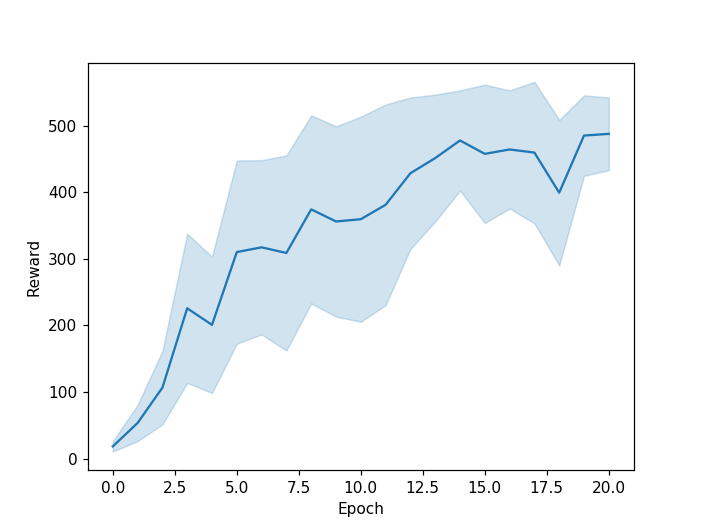

The training was done over a total of 1285 episodes


In [284]:
rewards = agent.training_batch(1000, 256)

### Evaluation

In [285]:
eval_agent(agent, 100, 0.05, 0.2)

NameError: name 'eval_agent' is not defined

In [12]:
eval_agent(agent, 100, 0.2, 0.5)

C:\tools\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until



Mean success : 478.49 +- 58.00


In [9]:
eval_agent(agent, 100, 0.2, 1)

C:\tools\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until



Mean success : 451.28 +- 89.90


In [10]:
eval_agent(agent, 100, 0.5, 2)

C:\tools\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until



Mean success : 184.08 +- 206.71


In [11]:
eval_agent(agent, 100, 1, 5)

C:\tools\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until



Mean success : 25.78 +- 58.29


## NAU

In [155]:
layer_name = 'ReRegualizedLinearMNAC'
# layer_name = 'NAC'
class ValueNetworkNAU(nn.Module):

    def __init__(self, input_size, hidden_size, output_size):
        super(ValueNetworkNAU, self).__init__()
        self.fc1 = stable_nalu.layer.GeneralizedLayer(input_size, hidden_size, layer_name)
        self.fc2 = stable_nalu.layer.GeneralizedLayer(hidden_size, hidden_size, layer_name)
        self.fc22 = stable_nalu.layer.GeneralizedLayer(hidden_size, hidden_size*2, layer_name)
        self.fc23 = stable_nalu.layer.GeneralizedLayer(hidden_size*2, hidden_size, layer_name)
        self.fc3 = stable_nalu.layer.GeneralizedLayer(hidden_size, output_size, layer_name)
    
        self.fc1.reset_parameters()
        self.fc2.reset_parameters()
        self.fc22.reset_parameters()
        self.fc23.reset_parameters()
        self.fc3.reset_parameters()

    def forward(self, x):
        #adding RELUs is a bad idea!
        if len(x.size()) == 1:
            x = x[None]
        out = self.fc1(x)
        #out = nn.functional.relu(out)
        out = self.fc2(out)
        #out = nn.functional.relu(out)
        out = self.fc22(out)
        #out = nn.functional.relu(out)
        out = self.fc23(out)
        #out = nn.functional.relu(out)
        out = self.fc3(out)
        return out
    
    def predict(self, x):
        return self(x).detach().numpy()[0]

In [143]:
layer_name = 'NAC'
class ActorNetworkNAU(nn.Module):

    def __init__(self, input_size, hidden_size, action_size):
        super(ActorNetworkNAU, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, action_size)

    def forward(self, x):
        out = F.relu(self.fc1(x))
        out = F.relu(self.fc2(out))
        out = F.softmax(self.fc3(out), dim=-1)
        return out
    
    def select_action(self, x):
        return torch.multinomial(self(x), 1).detach().numpy()

In [144]:
env_id = 'CartPole-v1'
value_learning_rate = 0.001
actor_learning_rate = 0.001
gamma = 0.99
entropy = 1
seed = 1

config_a2c = {
    'env_id': env_id,
    'gamma': gamma,
    'seed': seed,
    'value_network': {'learning_rate': value_learning_rate},
    'actor_network': {'learning_rate': actor_learning_rate},
    'entropy': entropy
}

print("Current config_a2c is:")
pprint(config_a2c)

Current config_a2c is:
{'actor_network': {'learning_rate': 0.001},
 'entropy': 1,
 'env_id': 'CartPole-v1',
 'gamma': 0.99,
 'seed': 1,
 'value_network': {'learning_rate': 0.001}}


In [145]:
agent = A2CAgentRandom(config_a2c, range_train=(0.1, 0.1), range_eval=(0.1, 0.1))

In [146]:
agent.actor_network = ActorNetworkNAU(agent.env.observation_space.shape[0] + 1, 16, agent.env.action_space.n)
agent.value_network = ValueNetworkNAU(agent.env.observation_space.shape[0] + 1, 16, 1)
agent.value_network_optimizer = optim.RMSprop(agent.value_network.parameters(), lr=config_a2c['value_network']['learning_rate'])
agent.actor_network_optimizer = optim.RMSprop(agent.actor_network.parameters(), lr=config_a2c['actor_network']['learning_rate'])

Epoch 0/1000: Mean rewards: 24.02, Std: 11.23
Epoch 50/1000: Mean rewards: 45.54, Std: 19.18
Epoch 100/1000: Mean rewards: 60.78, Std: 29.83
Epoch 150/1000: Mean rewards: 81.94, Std: 30.6
Epoch 200/1000: Mean rewards: 81.82, Std: 29.1
Epoch 250/1000: Mean rewards: 112.62, Std: 53.43
Epoch 300/1000: Mean rewards: 172.32, Std: 62.4
Epoch 350/1000: Mean rewards: 243.86, Std: 88.61
Epoch 400/1000: Mean rewards: 256.68, Std: 97.94
Epoch 450/1000: Mean rewards: 363.3, Std: 121.11
Epoch 500/1000: Mean rewards: 315.48, Std: 135.06
Epoch 550/1000: Mean rewards: 391.4, Std: 113.91
Epoch 600/1000: Mean rewards: 417.34, Std: 116.75
Epoch 650/1000: Mean rewards: 140.98, Std: 35.51
Epoch 700/1000: Mean rewards: 205.16, Std: 56.67
Epoch 750/1000: Mean rewards: 448.34, Std: 90.17
Epoch 800/1000: Mean rewards: 381.7, Std: 123.01
Epoch 850/1000: Mean rewards: 460.36, Std: 73.87
Epoch 900/1000: Mean rewards: 432.36, Std: 93.11
Epoch 950/1000: Mean rewards: 422.34, Std: 98.33
Epoch 999/1000: Mean rewards:

<IPython.core.display.Javascript object>


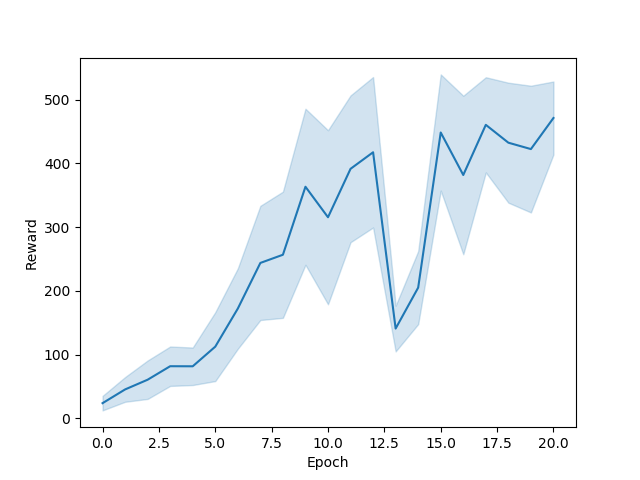

The trainnig was done over a total of 1792 episodes


In [147]:
rewards = agent.training_batch(1000, 256)

In [148]:
eval_agent(agent, 100, 0.1, 0.2)


Mean success : 469.13 +- 64.64


In [149]:
eval_agent(agent, 100, 0.05, 0.6)


Mean success : 460.91 +- 71.82


In [150]:
eval_agent(agent, 100, 0.05, 1.5)


Mean success : 340.54 +- 184.55


In [151]:
eval_agent(agent, 100, 0.05, 2)


Mean success : 221.98 +- 199.05


In [154]:
eval_agent(agent, 100, 0.01, 5)


Mean success : 69.89 +- 142.38


## Training on a larger range

In [45]:
agent2 = A2CAgentRandom(config_a2c, range_train=(0.05, 0.5), range_eval=(0.03, 0.7))
agent2.actor_network = ActorNetworkNAU(agent2.env.observation_space.shape[0] + 1, 16, agent2.env.action_space.n)
agent2.value_network = ValueNetworkNAU(agent2.env.observation_space.shape[0] + 1, 16, 1)
agent2.value_network_optimizer = optim.RMSprop(agent2.value_network.parameters(), lr=config_a2c['value_network']['learning_rate'])
agent2.actor_network_optimizer = optim.RMSprop(agent2.actor_network.parameters(), lr=config_a2c['actor_network']['learning_rate'])

Epoch 0/1000: Mean rewards: 19.34, Std: 11.05
Epoch 50/1000: Mean rewards: 45.02, Std: 23.78
Epoch 100/1000: Mean rewards: 66.04, Std: 35.48
Epoch 150/1000: Mean rewards: 93.14, Std: 44.24
Epoch 200/1000: Mean rewards: 188.86, Std: 91.06
Epoch 250/1000: Mean rewards: 267.9, Std: 96.38
Epoch 300/1000: Mean rewards: 306.1, Std: 133.77
Epoch 350/1000: Mean rewards: 378.86, Std: 113.9
Epoch 400/1000: Mean rewards: 386.34, Std: 100.65
Epoch 450/1000: Mean rewards: 426.6, Std: 109.38
Epoch 500/1000: Mean rewards: 371.22, Std: 98.3
Epoch 550/1000: Mean rewards: 463.44, Std: 98.02
Epoch 600/1000: Mean rewards: 464.66, Std: 82.45
Epoch 650/1000: Mean rewards: 361.02, Std: 121.06
Epoch 700/1000: Mean rewards: 442.12, Std: 107.0
Epoch 750/1000: Mean rewards: 382.1, Std: 121.59
Epoch 800/1000: Mean rewards: 476.16, Std: 80.25
Epoch 850/1000: Mean rewards: 470.8, Std: 76.01
Epoch 900/1000: Mean rewards: 475.16, Std: 82.79
Epoch 950/1000: Mean rewards: 433.68, Std: 99.59
Epoch 999/1000: Mean rewards

<IPython.core.display.Javascript object>


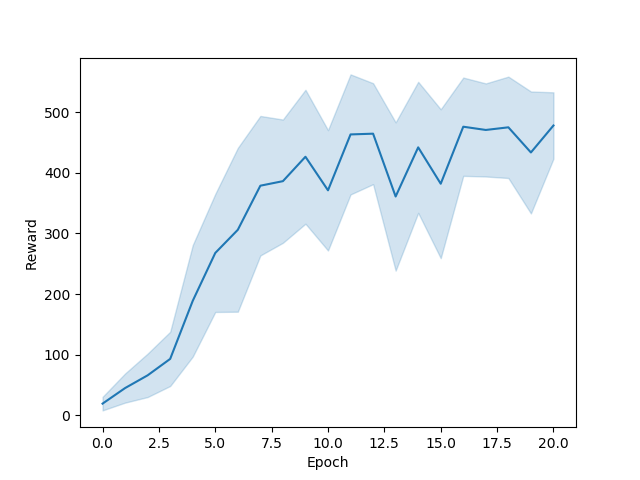

The trainnig was done over a total of 1418 episodes


In [47]:
rewards = agent2.training_batch(1000, 256)

In [50]:
eval_agent(agent2, 100, 0.1, 0.2)
eval_agent(agent2, 100, 0.05, 0.6)
eval_agent(agent2, 100, 0.05, 2)
eval_agent(agent2, 100, 0.01, 5)


Mean success : 471.55 +- 80.27



Mean success : 478.28 +- 61.72



Mean success : 222.54 +- 207.78



Mean success : 112.38 +- 187.77


In [58]:
agent3 = A2CAgentRandom(config_a2c, range_train=(0.05, 0.5), range_eval=(0.03, 0.7))
agent3.actor_network = ActorNetworkNAU(agent3.env.observation_space.shape[0] + 1, 64, agent3.env.action_space.n)
agent3.value_network = ValueNetworkNAU(agent3.env.observation_space.shape[0] + 1, 64, 1)
agent3.value_network_optimizer = optim.RMSprop(agent3.value_network.parameters(), lr=config_a2c['value_network']['learning_rate'])
agent3.actor_network_optimizer = optim.RMSprop(agent3.actor_network.parameters(), lr=config_a2c['actor_network']['learning_rate'])

Epoch 0/1000: Mean rewards: 24.36, Std: 15.53
Epoch 50/1000: Mean rewards: 151.48, Std: 79.44
Epoch 100/1000: Mean rewards: 348.7, Std: 121.32
Epoch 150/1000: Mean rewards: 249.04, Std: 83.65
Epoch 200/1000: Mean rewards: 443.16, Std: 108.68
Epoch 250/1000: Mean rewards: 460.14, Std: 86.85
Epoch 300/1000: Mean rewards: 477.24, Std: 81.81
Epoch 350/1000: Mean rewards: 451.56, Std: 90.88
Epoch 400/1000: Mean rewards: 225.66, Std: 61.34
Epoch 450/1000: Mean rewards: 483.46, Std: 66.62
Epoch 500/1000: Mean rewards: 320.12, Std: 98.92
Epoch 550/1000: Mean rewards: 476.68, Std: 79.61
Epoch 600/1000: Mean rewards: 466.48, Std: 100.29
Epoch 650/1000: Mean rewards: 488.04, Std: 48.2
Epoch 700/1000: Mean rewards: 489.0, Std: 48.71
Epoch 750/1000: Mean rewards: 478.48, Std: 86.3
Epoch 800/1000: Mean rewards: 492.2, Std: 54.6
Early stopping !


<IPython.core.display.Javascript object>


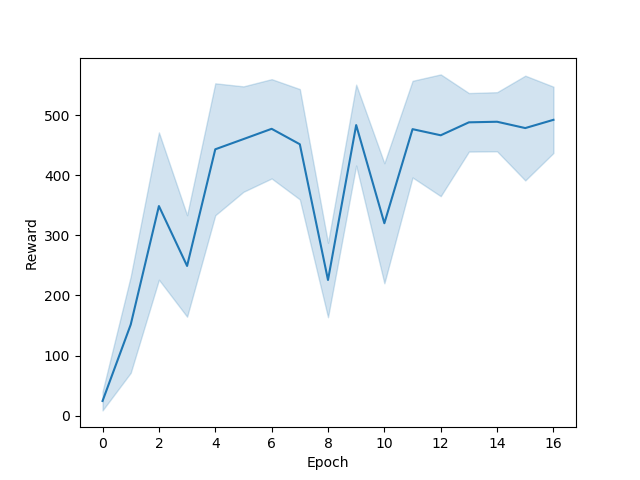

The trainnig was done over a total of 747 episodes


In [59]:
rewards = agent3.training_batch(1000, 256)

In [60]:
eval_agent(agent3, 100, 0.1, 0.2)
eval_agent(agent3, 100, 0.05, 0.6)
eval_agent(agent3, 100, 0.05, 2)
eval_agent(agent3, 100, 0.01, 5)


Mean success : 489.78 +- 60.00



Mean success : 484.90 +- 69.11



Mean success : 259.90 +- 224.20



Mean success : 109.22 +- 187.75


In [61]:
#si la masse est plus petite le probleme est plus facile
eval_agent(agent3, 100, 0.001,0.01)


Mean success : 498.28 +- 17.11


In [63]:
eval_agent(agent3, 100, 0.5, 1.5)


Mean success : 288.48 +- 202.57


## Basic regression task

In [138]:
from sklearn import datasets
data = sklearn.datasets.load_diabetes()

X= data['data']
y=data['target']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)

(353, 10) (353,)


In [141]:
class MLP(nn.Module):

    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)
    

    def forward(self, x):
        if len(x.size()) == 1:
            x = x[None]
        out = self.fc1(x)
        out = nn.functional.relu(out)
        out = self.fc2(out)
        out = nn.functional.relu(out)
        out = self.fc3(out)
        return out
    
    def predict(self, x):
        return self(x).detach().numpy()[0]

In [140]:
#classif = ValueNetworkNAU(X_train.shape[1],32,1)
classif = MLP(X_train.shape[1],32,1)
optimizer = optim.RMSprop(classif.parameters(), lr=0.01)
criterion = torch.nn.MSELoss() 
from torch.autograd import Variable
epochs = 200
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 5, 0.8)
for epoch in range(epochs):
    # Converting inputs and labels to Variable

    inputs=torch.tensor(X_train, dtype=torch.float)
    labels=torch.tensor(y_train, dtype=torch.float)

    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = classif(inputs)

    # get loss for the predicted output
    loss = criterion(outputs, labels)

    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()
    
    scheduler.step()


    #print('epoch {}, loss {}'.format(epoch, loss.item()))
    
from sklearn.metrics import mean_squared_error
with torch.no_grad(): # we don't need gradients in the testing phase
    classif.eval()
    predicted = np.array(classif(torch.tensor(X_test, dtype=torch.float))).flatten()

    print(np.sqrt(mean_squared_error(y_test, predicted)))

/home/raphaelg/anaconda3/lib/python3.7/site-packages/torch/nn/modules/loss.py:431: UserWarning: Using a target size (torch.Size([353])) that is different to the input size (torch.Size([353, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


73.23595747282604
